In [1]:
import pandas as pd
import numpy as np

# Load your own dataset here
# df = pd.read_csv('loan_approval.csv')

# Or generate sample data
data = {
    'Age': np.random.randint(21, 60, 100),
    'Income': np.random.randint(25000, 120000, 100),
    'Education': np.random.choice(['Graduate', 'Not Graduate'], 100),
    'CreditScore': np.random.randint(300, 900, 100),
    'LoanAmount': np.random.randint(10000, 500000, 100),
    'Loan_Status': np.random.choice(['Approved', 'Rejected'], 100)
}

df = pd.DataFrame(data)
print(df.head())


   Age  Income     Education  CreditScore  LoanAmount Loan_Status
0   33   46324  Not Graduate          501       22413    Approved
1   26   27554  Not Graduate          534       38156    Approved
2   41   59270  Not Graduate          602      460392    Rejected
3   29   66210  Not Graduate          302       79891    Approved
4   42   81628      Graduate          623      301072    Approved


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Encode categorical features
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])  # Graduate = 1, Not Graduate = 0
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])  # Approved = 1, Rejected = 0

# Check for missing values
print(df.isnull().sum())

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Age            0
Income         0
Education      0
CreditScore    0
LoanAmount     0
Loan_Status    0
dtype: int64


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()


Logistic Regression Accuracy: 0.55
Confusion Matrix:
[[5 7]
 [2 6]]

Random Forest Accuracy: 0.60
Confusion Matrix:
[[6 6]
 [2 6]]


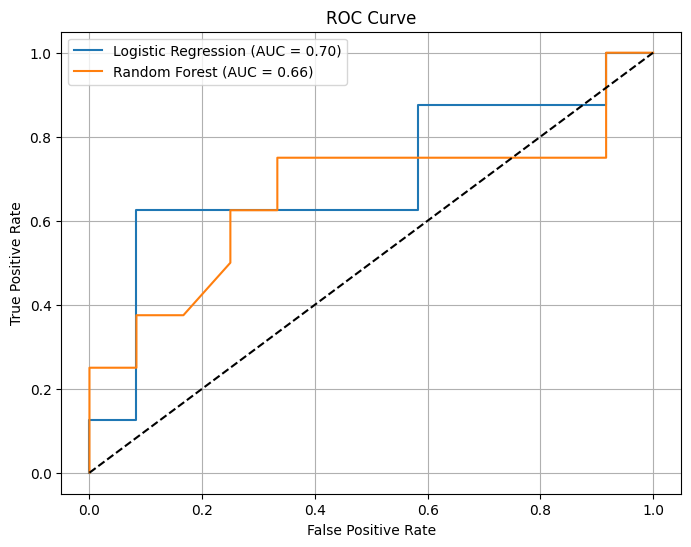

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"\n{name} Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(cm)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8,6))
evaluate_model(log_model, X_test, y_test, "Logistic Regression")
evaluate_model(rf_model, X_test, y_test, "Random Forest")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
